In [13]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator
from scipy.interpolate import splrep, splev, splprep, interp1d
from scipy.optimize import curve_fit
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
import I_n_P as P
from importlib import reload
plt.style.use('ggplot')
path = 'C:\\WINDOWS\\Fonts\\BOOKOS.TTF'
prop = fm.FontProperties(fname=path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}',
          r'\usepackage{xfrac}']

In [14]:
reload(P)

<module 'I_n_P' from 'C:\\Users\\giannis\\Desktop\\Python_scrpts\\I_n_P.py'>

In [15]:
'''Read in all values.'''
_, Bp, B = P.magnetic_read()
_, ti, te = P.read_temp()
_, n = P.density_read()
angle, eq, tur = P.particle_exb_read()
_, mag, R, Z = P.mag_flux_read()
e_eq, e_tur = P.e_heat_exb()
i_eq, i_tur = P.i_heat_exb()
_, shear = P.shear_read()
_, Lte, Lti, Ln = P.scale_read() #reads inverse scale lengths.

In [16]:
trapped = P.trapped(P.smooth(mag,30))

C:\Users\giannis\Desktop\Python_scrpts\I_n_P.py:201: RuntimeWarning: invalid value encountered in double_scalars
  A = np.sin((np.pi)*x/180.0)/np.sqrt(1-np.cos((np.pi)*x/180.0))


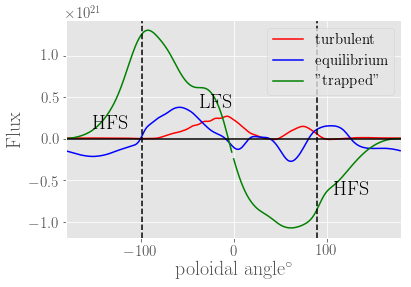

In [17]:
'''Plotting all fluxes.'''
plt.plot([x for x in range(-180,180)], np.roll(tur,180),'r-',label='turbulent')
plt.plot([x for x in range(-180,180)],np.roll(eq,180),'b-',label='equilibrium')
plt.plot([x for x in range(-180,180)],np.roll(list(reversed(trapped)),180),'g-',label='"trapped"')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.4, 0.6),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.8, 0.2),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.08, 0.5),textcoords='axes fraction')
plt.xlabel(r'poloidal angle$^{\circ}$')
plt.ylabel(r'Flux')
plt.xlim(-180,180)
plt.legend()
plt.show()

In [31]:
'''Writing files for storage.'''
angle = [x for x in range(0,360)]
trap = list(reversed(trapped))
#plt.plot(angle,trap)
#plt.show()
file = open("ti255_trapped(fig4).txt",'a')
file.write("angle"+"\t"+"trapped"+"\n")
for i in range(len(angle)):
    file.write(str(angle[i])+"\t"+str(trap[i])+"\n")
file.close()    

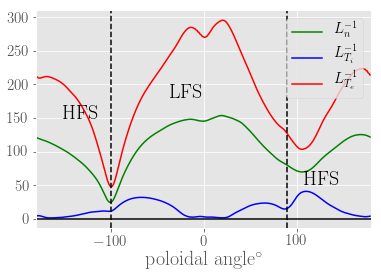

In [18]:
'''Ploting scale lengths.'''
plt.plot([x for x in range(-180,180)],np.roll(Ln,180),'g-',label=r'$L^{-1}_{n}$')
plt.plot([x for x in range(-180,180)],np.roll(Lti,180),'b-',label=r'$L^{-1}_{T_i}$')
plt.plot([x for x in range(-180,180)],np.roll(Lte,180),'r-',label=r'$L^{-1}_{T_e}$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.4, 0.6),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.8, 0.2),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.08, 0.5),textcoords='axes fraction')
plt.xlabel(r'poloidal angle$^{\circ}$')
plt.xlim(-180,180)
plt.legend()
plt.show()

In [19]:
'''Calculating diffusivities.'''
Lpi = Ln+Lti #these are inverse scale lengths.
Lpe = Ln+Lte
'''Equilibrium diffusivities.'''
D_eq = (eq)/(n*Ln)
chi_i_eq = (i_eq)/(Lpi*n*ti)
chi_e_eq = (e_eq)/(Lpe*n*te)
'''Turbulent diffusivities.'''
D_tur = (tur)/(Ln*n)
chi_i_tur = (i_tur)/(Lpi*n*ti)
chi_e_tur = (e_tur)/(Lpe*n*te)

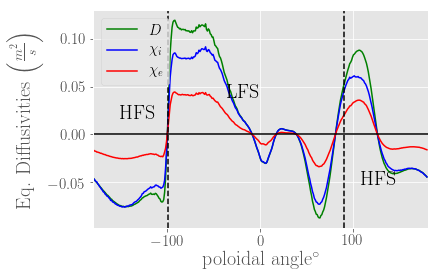

In [20]:
'''Plotting equilibrium diffusivities.'''
plt.plot([x for x in range(-180,180)],np.roll(D_eq,180),'g-',label=r'$D$')
plt.plot([x for x in range(-180,180)],np.roll(chi_i_eq,180),'b-',label=r'$\chi_i$')
plt.plot([x for x in range(-180,180)],np.roll(chi_e_eq,180),'r-',label=r'$\chi_e$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.4, 0.6),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.8, 0.2),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.08, 0.5),textcoords='axes fraction')
plt.xlabel(r'poloidal angle$^{\circ}$')
plt.xlim(-180,180)
h = plt.ylabel(r'Eq. Diffusivities $\left(\frac{m^2}{s}\right)$')
h.set_rotation(90)
plt.legend(loc=2)
plt.show()

In [32]:
'''Writing files for storage.'''
file = open("ti255_eq_diff(fig10).txt",'a')
file.write("angle"+"\t"+"D"+"\t"+"chi_i"+"\t"+"chi_e"+"\n")
for i in range(len(angle)):
    file.write(str(angle[i])+"\t"+str(D_eq[i])+"\t"+str(chi_i_eq[i])+"\t"+str(chi_e_eq[i])+"\n")
file.close()    

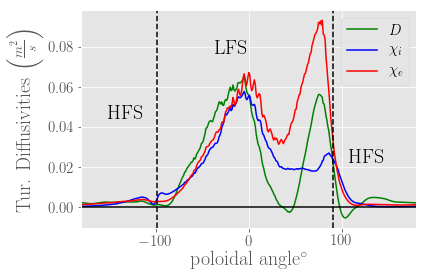

In [21]:
'''Plotting turbulent diffusivities.'''
plt.plot([x for x in range(-180,180)],np.roll(D_tur,180),'g-',label=r'$D$')
plt.plot([x for x in range(-180,180)],np.roll(chi_i_tur,180),'b-',label=r'$\chi_i$')
plt.plot([x for x in range(-180,180)],np.roll(chi_e_tur,180),'r-',label=r'$\chi_e$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.4, 0.8),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.8, 0.3),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.08, 0.5),textcoords='axes fraction')
plt.xlabel(r'poloidal angle$^{\circ}$')
plt.xlim(-180,180)
h = plt.ylabel(r'Tur. Diffusivities $\left(\frac{m^2}{s}\right)$')
h.set_rotation(90)
plt.legend()
plt.show()

In [33]:
'''Writing files for storage.'''
file = open("ti255_tur_diff(fig11).txt",'a')
file.write("angle"+"\t"+"D"+"\t"+"chi_i"+"\t"+"chi_e"+"\n")
for i in range(len(angle)):
    file.write(str(angle[i])+"\t"+str(D_tur[i])+"\t"+str(chi_i_tur[i])+"\t"+str(chi_e_tur[i])+"\n")
file.close()    

In [22]:
'''Making two y-axes having common zero.'''
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

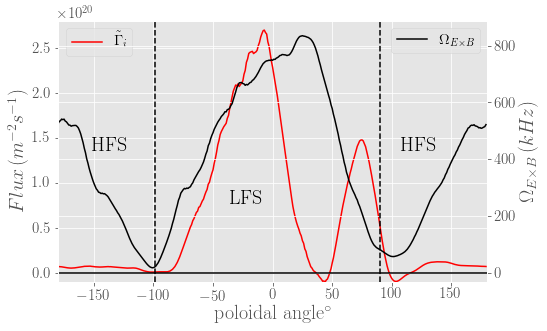

In [23]:
'''Shear vs. turbulent flux.'''
fig,ax1 = plt.subplots(figsize=(8, 5))
ax1.plot([x for x in range(-180,180)],np.roll(tur,180),'r',label=r'$\tilde{\Gamma}_i$')
#ax1.plot([x for x in range(-180,180)],np.roll(i_tur,180),'b',label=r'$\tilde{Q}_i$')
#ax1.plot([x for x in range(-180,180)],np.roll(e_tur,180),'r',label=r'$\tilde{Q}_e$')
ax2 = ax1.twinx()
ax2.plot([x for x in range(-180,180)],np.roll(shear,180),'k',label=r'$\Omega_{E\times B}$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.4, 0.3),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.8, 0.5),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.08, 0.5),textcoords='axes fraction')
ax1.set_xlabel(r'poloidal angle$^{\circ}$')
ax1.set_xlim(-180.0,180.0)
ax1.set_ylim(-0.1e20,2.8e20)
ax2.set_ylim(-100,820)
ax1.yaxis.set_label_position("left")
ax1.set_ylabel(r'$Flux\, (m^{-2}s^{-1})$')
ax2.set_ylabel(r'$\Omega_{E\times B} \,(kHz)$')
align_yaxis(ax1, 0, ax2, 0)
fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

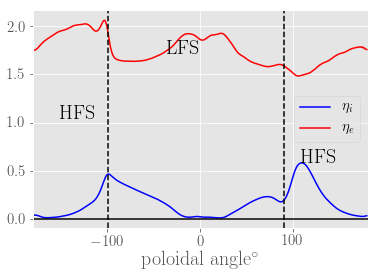

In [24]:
'''etas.'''
eta_i = Lti/Ln
eta_e = Lte/Ln
'''eta plotting.'''
plt.plot([x for x in range(-180,180)],np.roll(eta_i,180),'b-',label=r'$\eta_i$')
plt.plot([x for x in range(-180,180)],np.roll(eta_e,180),'r-',label=r'$\eta_e$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.4, 0.8),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.8, 0.3),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.08, 0.5),textcoords='axes fraction')
plt.xlabel(r'poloidal angle$^{\circ}$')
plt.xlim(-180,180)
plt.legend()
plt.show()

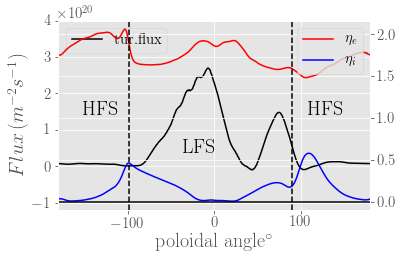

In [25]:
'''etas vs particle turbulence.'''
fig,ax1 = plt.subplots()
ax1.plot([x for x in range(-180,180)],np.roll(tur,180),'k',label='tur.flux')
ax2 = ax1.twinx()
ax2.plot([x for x in range(-180,180)],np.roll(eta_e,180),'r',label=r'$\eta_e$')
ax2.plot([x for x in range(-180,180)],np.roll(eta_i,180),'b',label=r'$\eta_i$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.4, 0.3),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.8, 0.5),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.08, 0.5),textcoords='axes fraction')
ax1.set_xlabel(r'poloidal angle$^{\circ}$')
ax1.set_xlim(-180.0,180.0)
ax1.set_ylim(-1.2e20,4e20)
ax1.yaxis.set_label_position("left")
ax1.set_ylabel(r'$Flux\, (m^{-2}s^{-1})$')
#ax2.set_ylabel(r'$\Omega_{E\times B} \,(kHz)$')
fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

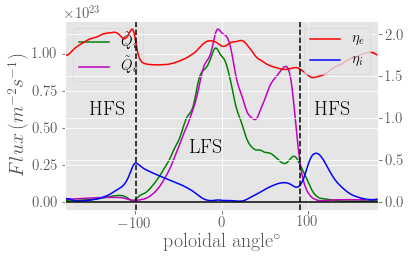

In [26]:
'''etas vs heat turbulence.'''
fig,ax1 = plt.subplots()
ax1.plot([x for x in range(-180,180)],np.roll(i_tur,180),'g',label=r'$\tilde{Q}_i$')
ax1.plot([x for x in range(-180,180)],np.roll(e_tur,180),'m',label=r'$\tilde{Q}_e$')
ax2 = ax1.twinx()
ax2.plot([x for x in range(-180,180)],np.roll(eta_e,180),'r',label=r'$\eta_e$')
ax2.plot([x for x in range(-180,180)],np.roll(eta_i,180),'b',label=r'$\eta_i$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.4, 0.3),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.8, 0.5),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.08, 0.5),textcoords='axes fraction')
ax1.set_xlabel(r'poloidal angle$^{\circ}$')
ax1.set_xlim(-180.0,180.0)
#ax1.set_ylim(-1.2e20,4e20)
ax1.yaxis.set_label_position("left")
ax1.set_ylabel(r'$Flux\, (m^{-2}s^{-1})$')
#ax2.set_ylabel(r'$\Omega_{E\times B} \,(kHz)$')
fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

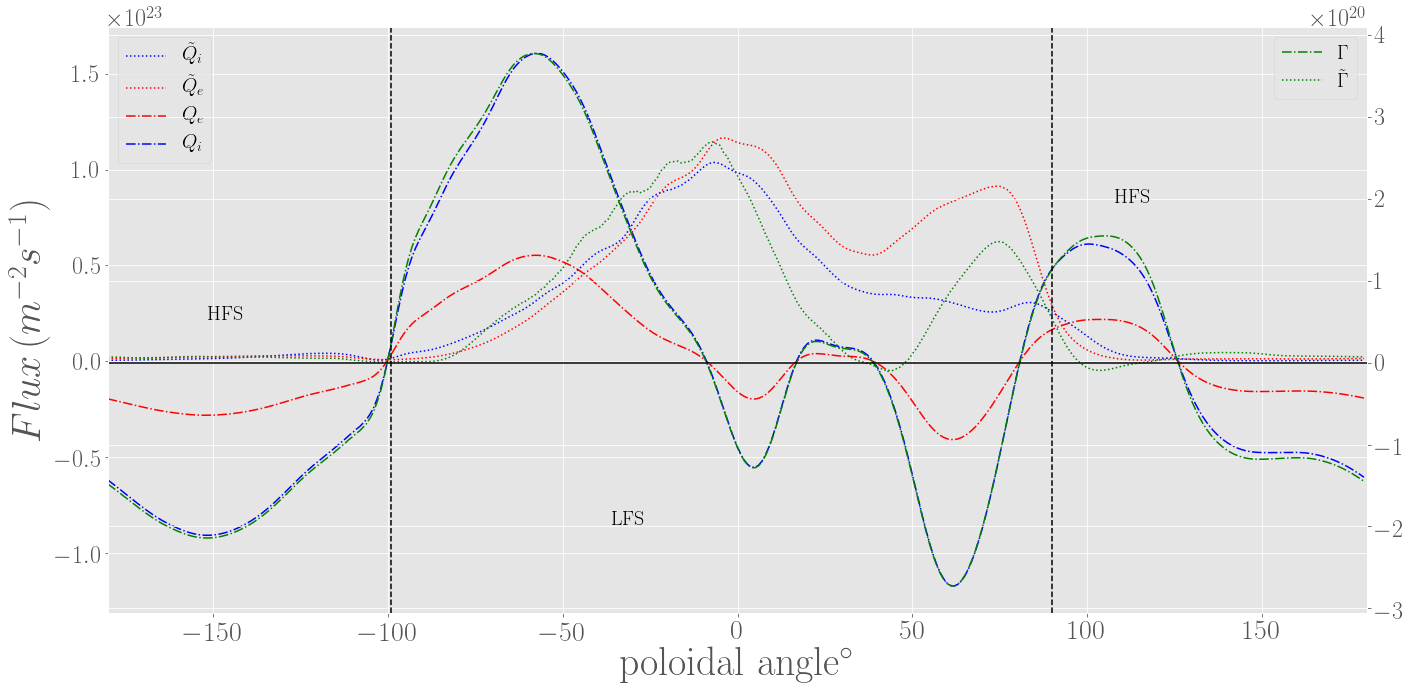

In [27]:
'''All turbulent and particle fluxes together'''
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 24
fig,ax1 = plt.subplots(figsize=(20, 10))
ax1.plot([x for x in range(-180,180)],np.roll(i_tur,180),'b:',label=r'$\tilde{Q}_i$')
ax1.plot([x for x in range(-180,180)],np.roll(e_tur,180),'r:',label=r'$\tilde{Q}_e$')
ax1.plot([x for x in range(-180,180)],np.roll(e_eq,180),'r-.',label=r'$Q_e$')
ax1.plot([x for x in range(-180,180)],np.roll(i_eq,180),'b-.',label=r'$Q_i$')
ax2 = ax1.twinx()
ax2.plot([x for x in range(-180,180)],np.roll(eq,180),'g-.',label=r'$\Gamma$')
ax2.plot([x for x in range(-180,180)],np.roll(tur,180),'g:',label=r'$\tilde{\Gamma}$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.4, 0.15),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.8, 0.7),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.08, 0.5),textcoords='axes fraction')
ax1.set_xlabel(r'poloidal angle$^{\circ}$')
ax1.set_xlim(-180.0,180.0)
#ax1.set_ylim(-1.2e20,4e20)
ax1.yaxis.set_label_position("left")
ax1.set_ylabel(r'$Flux\, (m^{-2}s^{-1})$')
#ax2.set_ylabel(r'$\Omega_{E\times B} \,(kHz)$')
fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()